## Muestra del algoritmo para enderezar documentos tomados con celular
El algoritmo funciona detectando las esquinas y buscando el área mas grande en la imagen, despues se le aplica un algoritmo para arreglar la perspectiva.

In [1]:
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
%matplotlib inline 
from skimage import io, color
import numpy as np
import cv2
import matplotlib.pyplot as plt

Number of Contours found = 171


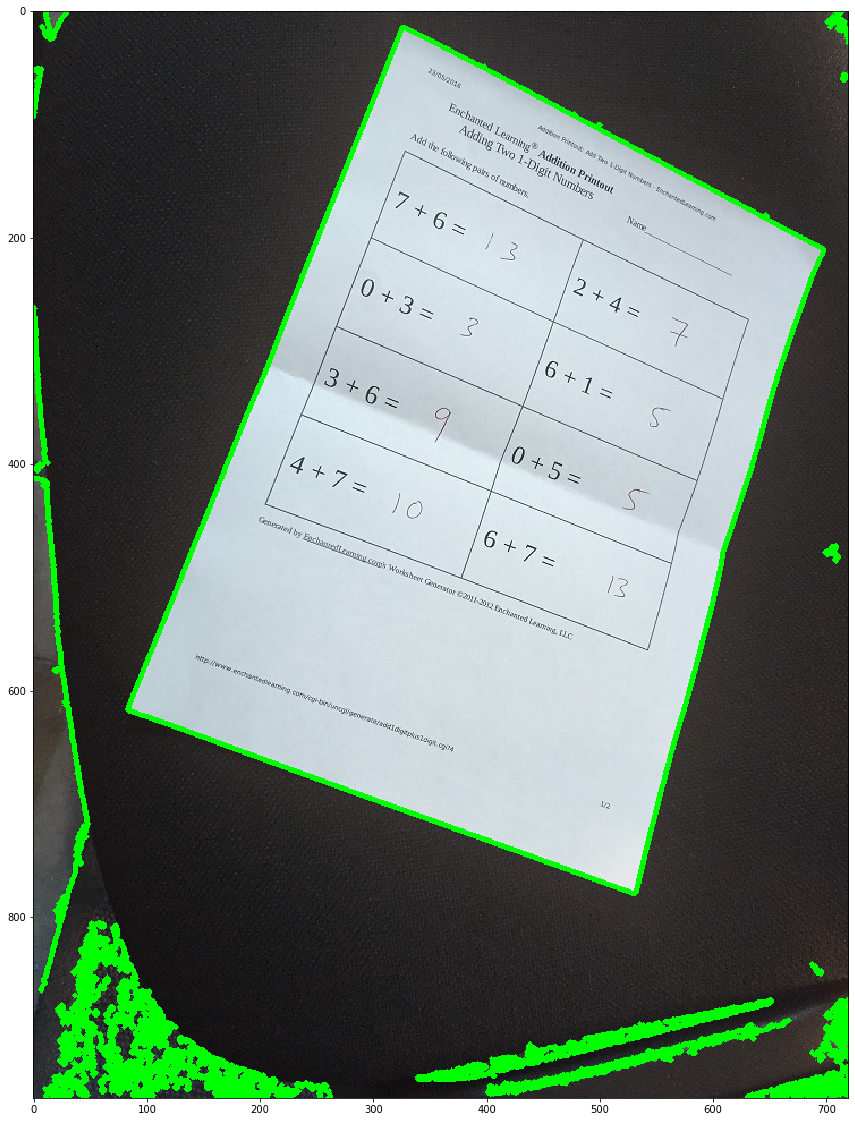

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen para organizar
image = cv2.imread('img/scan.jpg')
image2=image.copy()
image3=image.copy()

# Convertir a escala de grises
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Encontrar bordes con la función Canny
edged = cv2.Canny(gray, 30, 200)

# Encontrar contornos
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))

# Dibujar los contornos
# Usar '-1' para que aparezcan dibujados todos los contornos
cv2.drawContours(image, contours,-1, (0,255,0), 3)

plt.figure(figsize=(20,20))
plt.imshow(image)

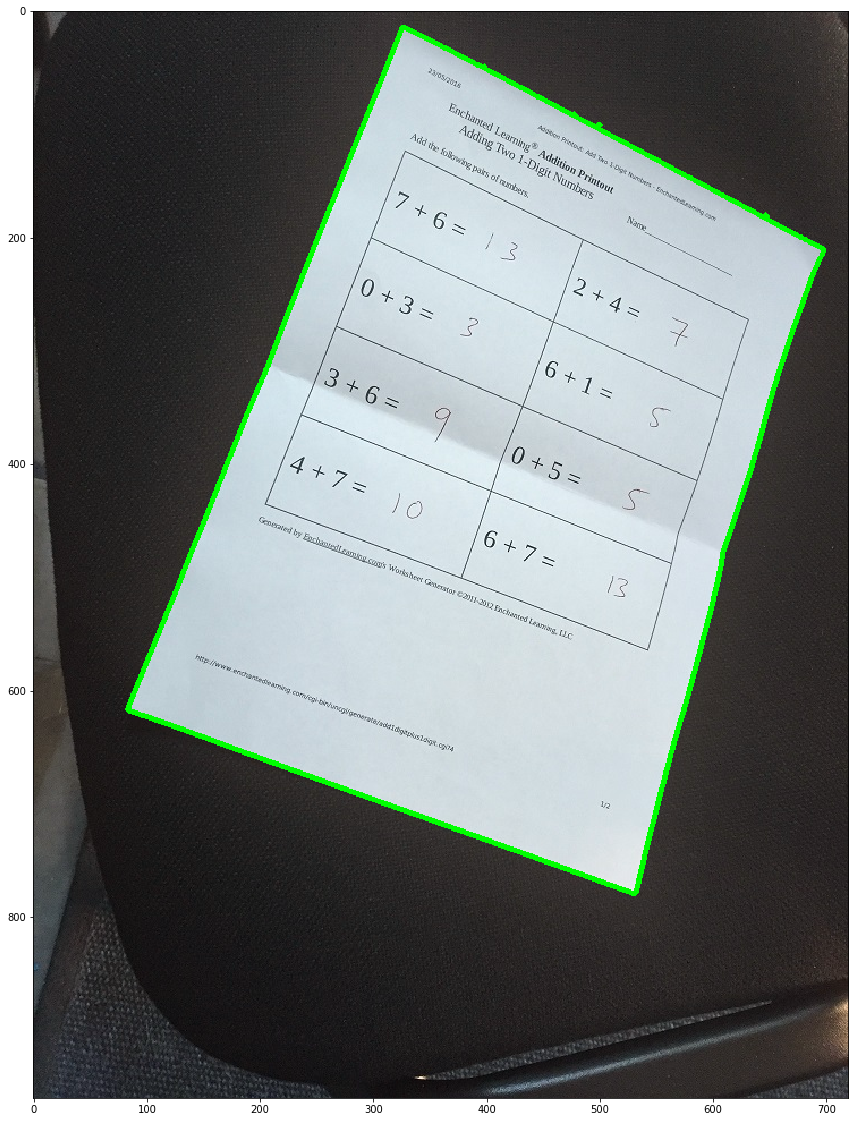

In [3]:
# Función para calcular el area que encierra cada contorno

def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Ordenar los contornos según el area que les corresponde

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Dibujar el contorno de mayor area

cv2.drawContours(image2, sorted_contours,0, (0,255,0), 3)

plt.figure(figsize=(20,20))
plt.imshow(image2)

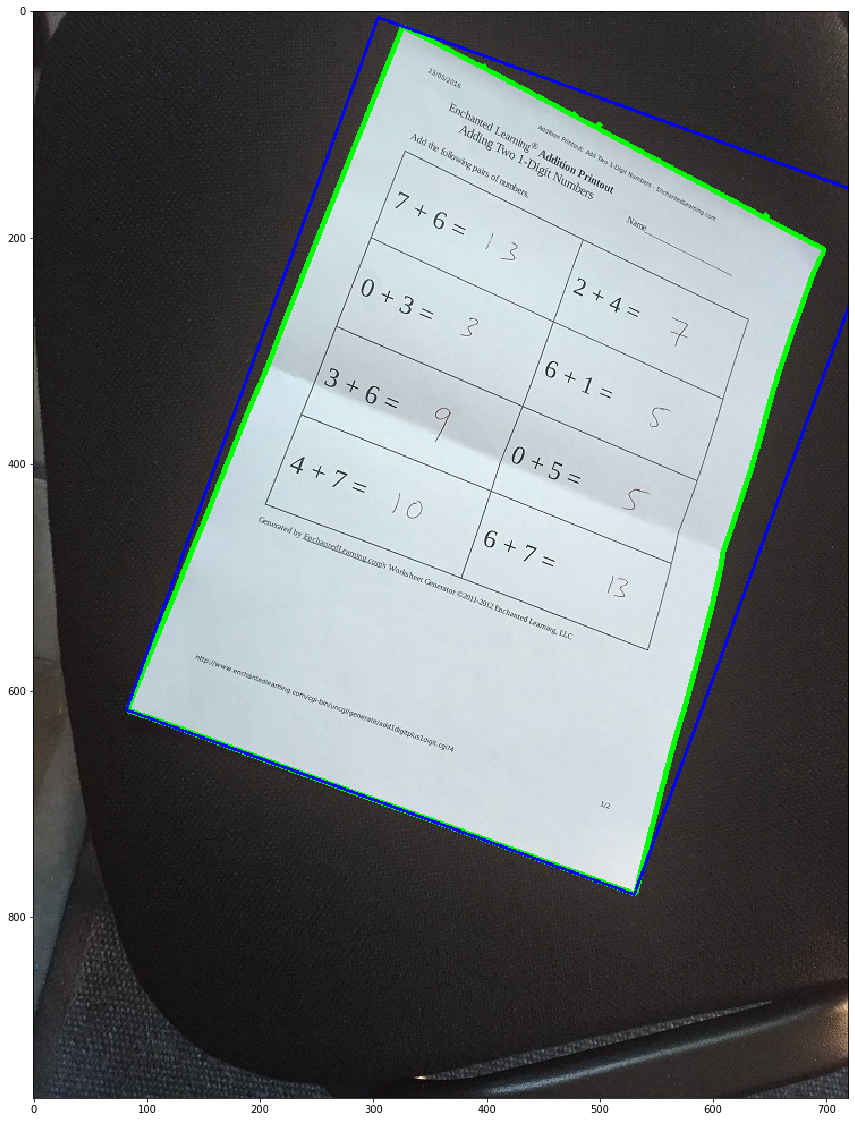

In [4]:
# Aproximar el contorno con un paralelogramo definido por 4 puntos.

cnt = sorted_contours[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image2,[box],0,(0,0,255),2)
plt.figure(figsize=(20,20))
plt.imshow(image2)

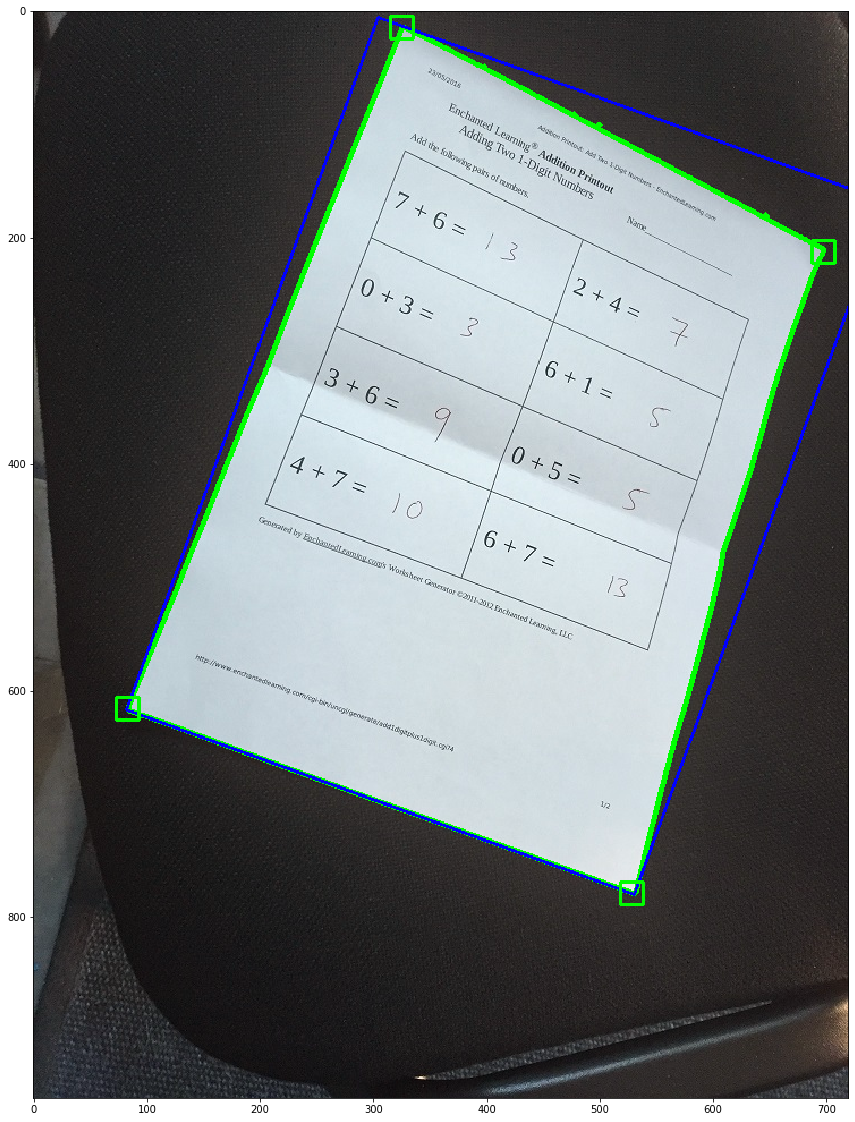

In [5]:
# Encontrar puntos extremos para determinar las esquinas de la imagen

cnt=sorted_contours[0]
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.rectangle(image2,(leftmost[0]-10,leftmost[1]-10),(leftmost[0]+10,leftmost[1]+10),(0,255,0), 2)
cv2.rectangle(image2,(rightmost[0]-10,rightmost[1]-10),(rightmost[0]+10,rightmost[1]+10),(0,255,0), 2)
cv2.rectangle(image2,(topmost[0]-10,topmost[1]-10),(topmost[0]+10,topmost[1]+10),(0,255,0), 2)
cv2.rectangle(image2,(bottommost[0]-10,bottommost[1]-10),(bottommost[0]+10,bottommost[1]+10),(0,255,0), 2)

plt.figure(figsize=(20,20))
plt.imshow(image2)


In [6]:
# encontrando vectores que indican que tan rotada esta la hoja
[vx,vy,x,y] = cv2.fitLine(box, cv2.DIST_L2,0,0.01,0.01)

In [7]:
# Calculando la tangente para determinar el angulo de rotación
tan=-vy[0]/vx[0]

In [8]:
# tangente inversa para saber el angulo

np.arctan(tan)*180/3.1416

69.94763296737845

In [9]:
# condición necesaria para no tener problemas si la oja viene rotada hacia del otro lado 

angulo=90-np.abs(np.arctan(tan)*180/3.1416)
if np.arctan(tan)*180/3.1416 < 0:
    angulo=-angulo

In [10]:
# centro respecto al que se realizará la rotación

centro_caja=cv2.moments(box)
cx = int(centro_caja['m10'] / centro_caja['m00'])
cy = int(centro_caja['m01'] / centro_caja['m00'])

In [11]:
height, width = image2.shape[:2]

# Rotar la imagen lo suficiente para poder clasificar los puntos extremos en superior izquierdo y derecho e inferior izquierdo y derecho

rotation_matrix = cv2.getRotationMatrix2D((cx, cy), angulo-10, 1)

rotated_image = cv2.warpAffine(image3, rotation_matrix, (width, height))


#plt.figure(figsize=(20,20))
#plt.imshow(rotated_image)

rotated_image2=rotated_image.copy()
rotated_image3=rotated_image.copy()
rotated_image4=rotated_image.copy()

# Grayscale
gray = cv2.cvtColor(rotated_image2,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(rotated_image, contours,-1, (0,255,0), 3);



Number of Contours found = 71


Number of Contours found = 71


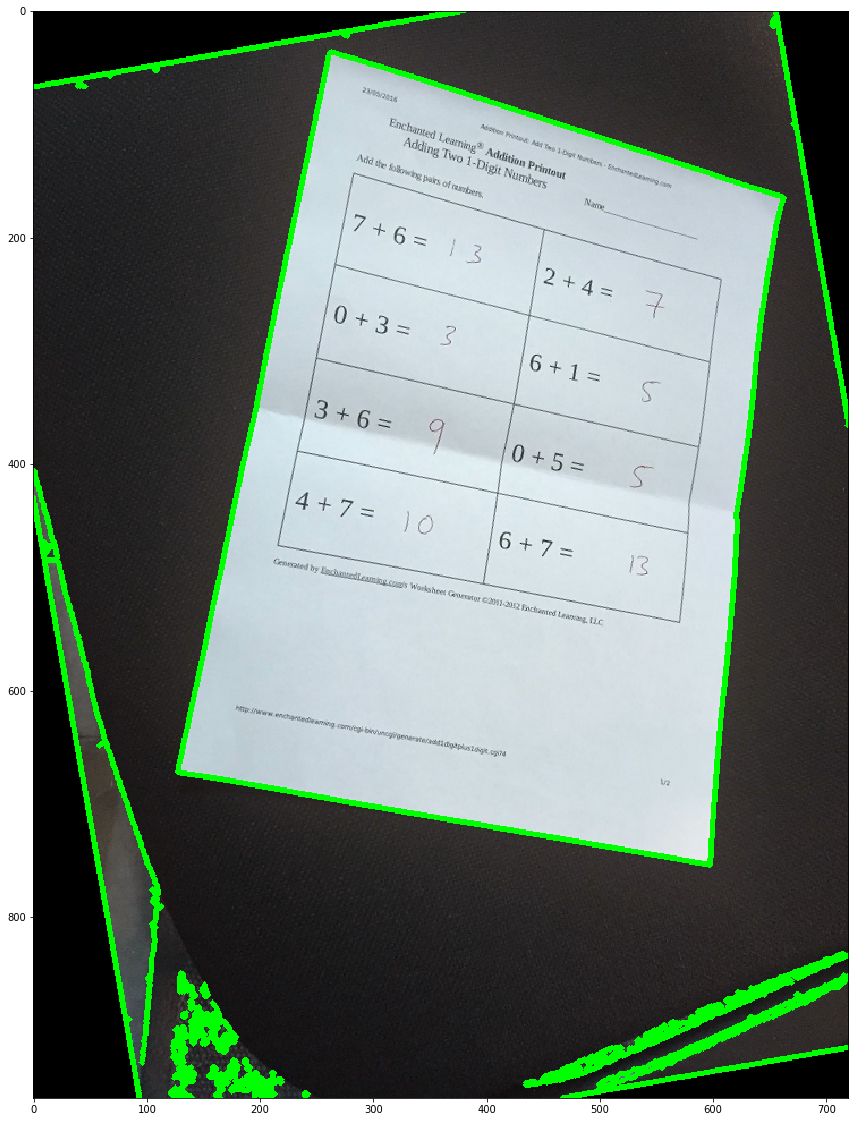

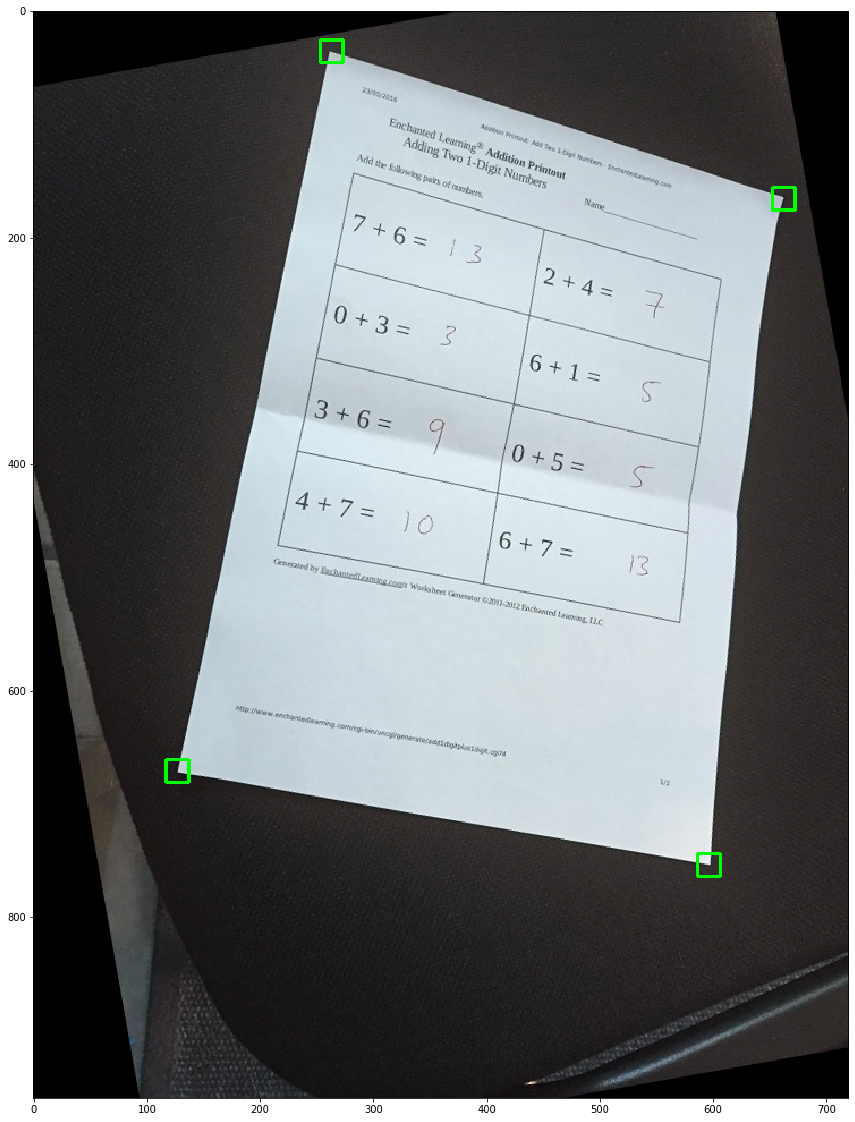

In [12]:

# Grayscale
gray = cv2.cvtColor(rotated_image2,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(rotated_image, contours,-1, (0,255,0), 3)

plt.figure(figsize=(20,20))
plt.imshow(rotated_image)


# Function we'll use to display contour area

def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.drawContours(rotated_image2, sorted_contours,0, (0,255,0), 3)

#plt.figure(figsize=(20,20))
#plt.imshow(rotated_image2)

cnt=sorted_contours[0]
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.rectangle(rotated_image3,(leftmost[0]-10,leftmost[1]-10),(leftmost[0]+10,leftmost[1]+10),(0,255,0), 2)
cv2.rectangle(rotated_image3,(rightmost[0]-10,rightmost[1]-10),(rightmost[0]+10,rightmost[1]+10),(0,255,0), 2)
cv2.rectangle(rotated_image3,(topmost[0]-10,topmost[1]-10),(topmost[0]+10,topmost[1]+10),(0,255,0), 2)
cv2.rectangle(rotated_image3,(bottommost[0]-10,bottommost[1]-10),(bottommost[0]+10,bottommost[1]+10),(0,255,0), 2)

plt.figure(figsize=(20,20))
plt.imshow(rotated_image3)

In [13]:
# Codigo para clasificar los puntos como superior izquierdo y derecho e inferior izquierdo y derecho

a=np.matrix(leftmost)
b=np.matrix(rightmost)
c=np.matrix(topmost)
d=np.matrix(bottommost)

centro_caja=cv2.moments(cnt)
cx = int(centro_caja['m10'] / centro_caja['m00'])
cy = int(centro_caja['m01'] / centro_caja['m00'])
cm=np.matrix([cx,cy])

am=a-cm
bm=b-cm
cm=c-cm
dm=d-cm



if am[0,0] >= 0 and am[0,1] >= 0:
    p04 = a[0,0]
    p14 = a[0,1]
elif am[0,0] >= 0 and am[0,1] <= 0:
    p03 = a[0,0]
    p13 = a[0,1]
elif am[0,0] <= 0 and am[0,1] <= 0:
    p02 = a[0,0]
    p12 = a[0,1]
elif am[0,0] <= 0 and am[0,1] >= 0: 
    p01 = a[0,0]
    p11 = a[0,1]
if bm[0,0] >= 0 and bm[0,1] >= 0:
    p04 = b[0,0]
    p14 = b[0,1]
elif bm[0,0] >= 0 and bm[0,1] <= 0:
    p03 = b[0,0]
    p13 = b[0,1]
elif bm[0,0] <= 0 and bm[0,1] <= 0:
    p02 = b[0,0]
    p12 = b[0,1]
elif bm[0,0] <= 0 and bm[0,1] >= 0: 
    p01 = b[0,0]
    p11 = b[0,1]
if cm[0,0] >= 0 and cm[0,1] >= 0:
    p04 = c[0,0]
    p14 = c[0,1]
elif cm[0,0] >= 0 and cm[0,1] <= 0:
    p03 = c[0,0]
    p13 = c[0,1]
elif cm[0,0] <= 0 and cm[0,1] <= 0:
    p02 = c[0,0]
    p12 = c[0,1]
elif cm[0,0] <= 0 and cm[0,1] >= 0: 
    p01 = c[0,0]
    p11 = c[0,1]
if dm[0,0] >= 0 and dm[0,1] >= 0:
    p04 = d[0,0]
    p14 = d[0,1]
elif dm[0,0] >= 0 and dm[0,1] <= 0:
    p03 = d[0,0]
    p13 = d[0,1]
elif dm[0,0] <= 0 and dm[0,1] <= 0:
    p02 = d[0,0]
    p12 = d[0,1]
elif dm[0,0] <= 0 and dm[0,1] >= 0: 
    p01 = d[0,0]
    p11 = d[0,1]


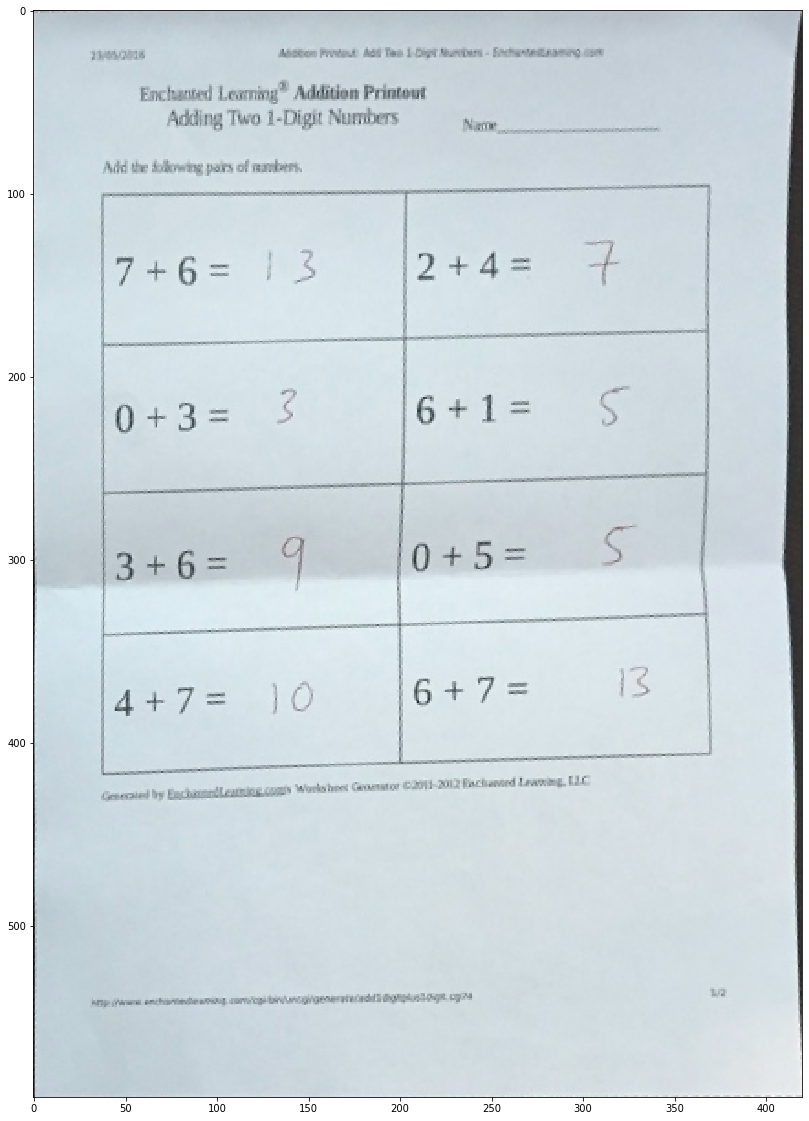

In [14]:
# Cordinates of the 4 corners of the original image
points_A = np.float32([[p02,p12], [p03,p13], [p01,p11], [p04,p14]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(rotated_image4, M, (420,594))

plt.figure(figsize=(20,20))
plt.imshow(warped)

## Muestras de preprocesamiento de una imagen en escaner
Se probo dos transformaciones en especial, transformaciones lineales y corrección gamma, las transformaciones lineales son útiles para cambiar el contraste y el brillo, junto con una ecualización. Pero en este caso la corrección gamma es mas útil para recuperar detalles.

In [17]:
def transformacionLineal(img,a,b):
    return cv2.add(cv2.multiply(img,(a,a,a,0)),(b,b,b,0))

In [18]:
img = cv2.imread("img/Vision09.jpg", cv2.COLOR_BGR2RGB)

C:\Users\yjean\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


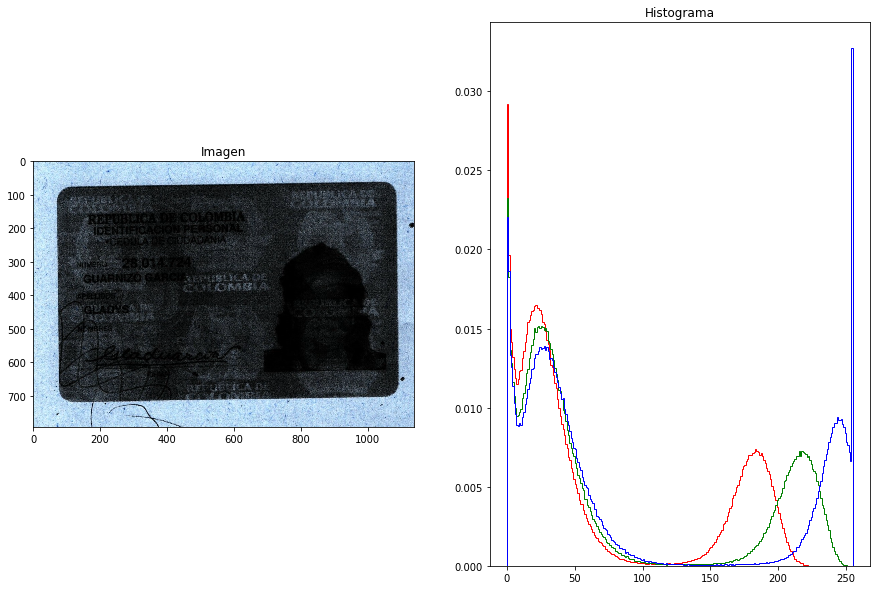

In [19]:
#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 10))
colors = ('r','g','b')
print(arreglo_plots)
#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0].set_title('Imagen')
arreglo_plots[0].imshow(img, cmap="gray")
arreglo_plots[1].set_title('Histograma')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

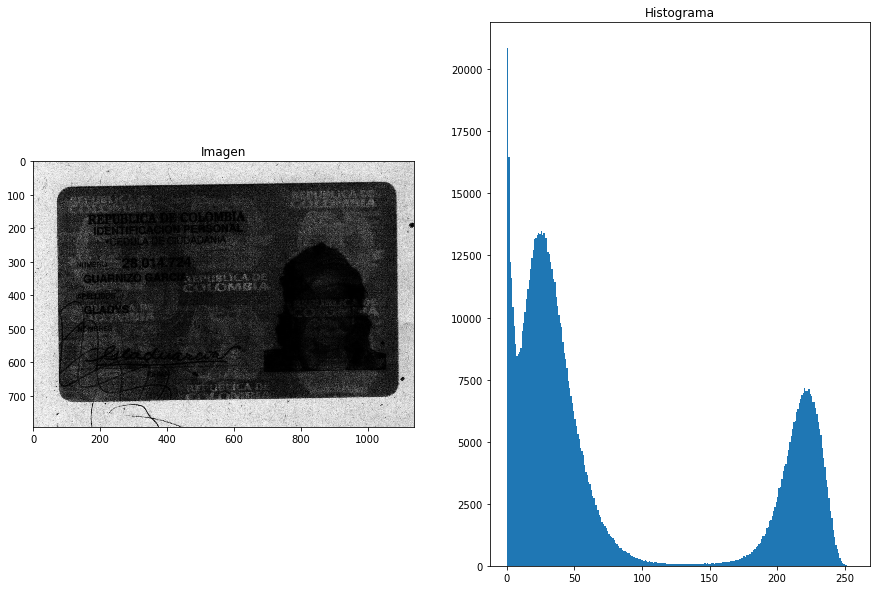

In [20]:
img2 = cv2.imread('img/Vision09.jpg',0)
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 10))
arreglo_plots[0].set_title('Imagen')
arreglo_plots[0].imshow(img2, cmap="gray")
arreglo_plots[1].set_title('Histograma')
arreglo_plots[1].hist(img2.ravel(),256,[0,256]); plt.show()

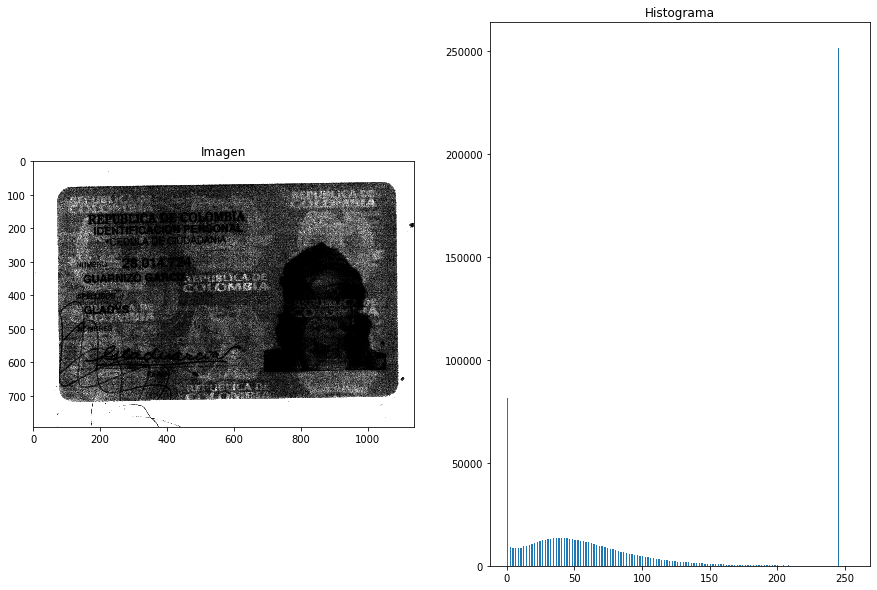

In [21]:
img3 = transformacionLineal(img2, 2,-10)
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 10))
arreglo_plots[0].set_title('Imagen')
arreglo_plots[0].imshow(img3, cmap="gray")
arreglo_plots[1].set_title('Histograma')
arreglo_plots[1].hist(img3.ravel(),256,[0,256]); plt.show()

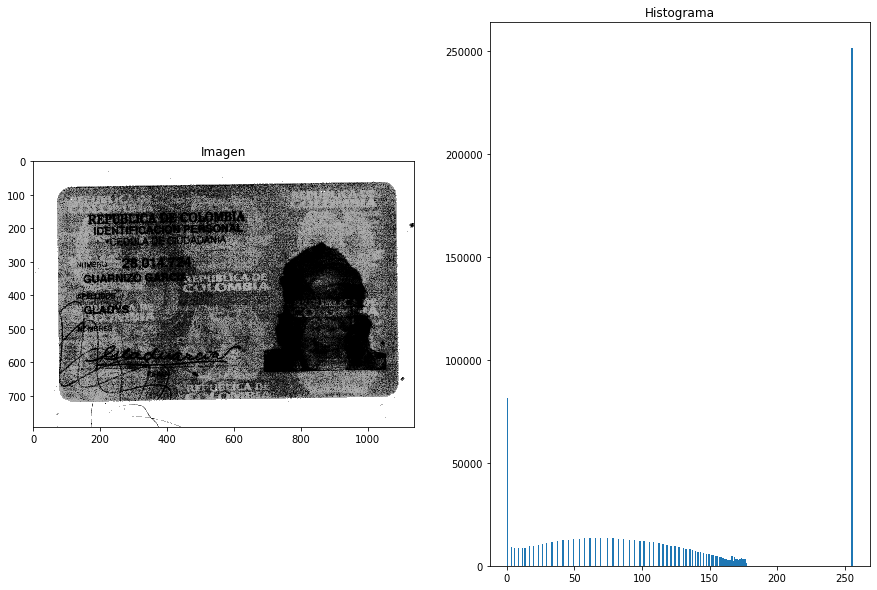

In [22]:
img5 = cv2.equalizeHist(img3)
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 10))
arreglo_plots[0].set_title('Imagen')
arreglo_plots[0].imshow(img5, cmap="gray")
arreglo_plots[1].set_title('Histograma')
arreglo_plots[1].hist(img5.ravel(),256,[0,256]); plt.show()

C:\Users\yjean\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\yjean\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\yjean\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:80: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


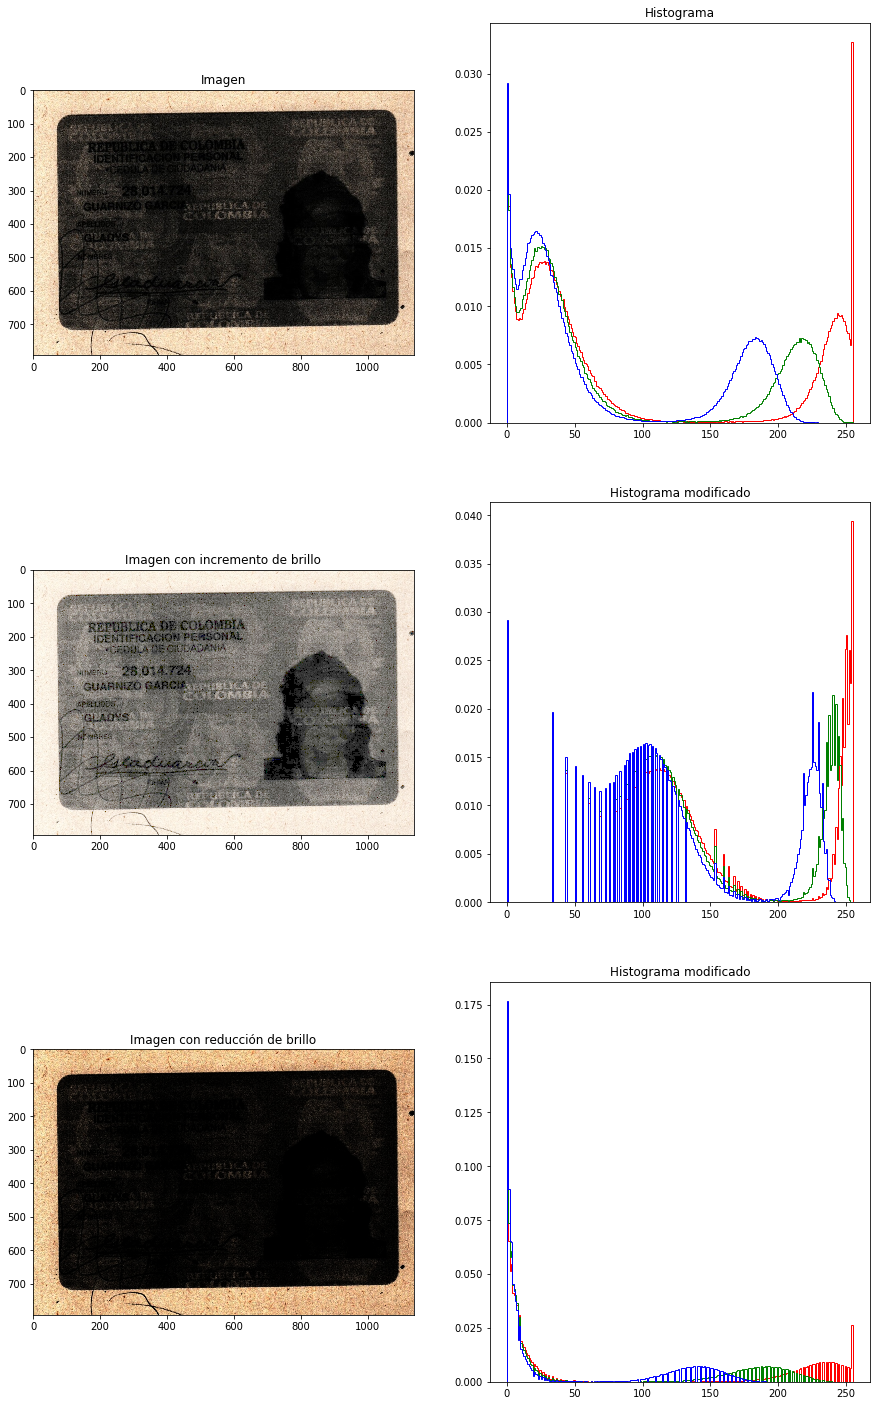

In [23]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('img/Vision09.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.365

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 1.8

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
#cv2.imwrite("res02.jpg", res_oscuro )